# Preprocess Experiments in Single Dataframes

In [1]:
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
from copy import deepcopy

# set seaborn settings for neurips paper
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

flier_props = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')

In [2]:
methods = ['OracleCPS', 'CCT-learner', 'CMC-T-learner', 'pseudo-CMC-T-learner', 'CMC-S-learner', 'pseudo-CMC-S-learner',
           'CMC-X-learner', 'pseudo-CMC-X-learner', 'BART', 'CEVAE', 'CMGP', 'DKLITE', 'GANITE', 'NOFLITE',
           'CCT-learner-NOFLITE', 'DiffPO', 'FCCN', 'CCT-learner-FCCN']
palette = dict(zip(
    methods,
    sns.color_palette("tab20", n_colors=len(methods))  # you can pick any palette
))

## Alaa et al. synthethic data (Setup A and B)

In [3]:
df_alaa = pd.read_csv("../../results/outputs/summary/alaa_dist_summary.csv")

In [4]:
df_alaa.loc[df_alaa["Method"].str.contains("CTT"), "Method"] = df_alaa.loc[df_alaa["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

In [5]:
excluded_methods = ["DiffPO", "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",  "CMC-S-learner", "CMC-X-learner"]
excluded_methods = ["DiffPO"]
df_alaa_filtered = df_alaa[~df_alaa["Method"].isin(excluded_methods)]

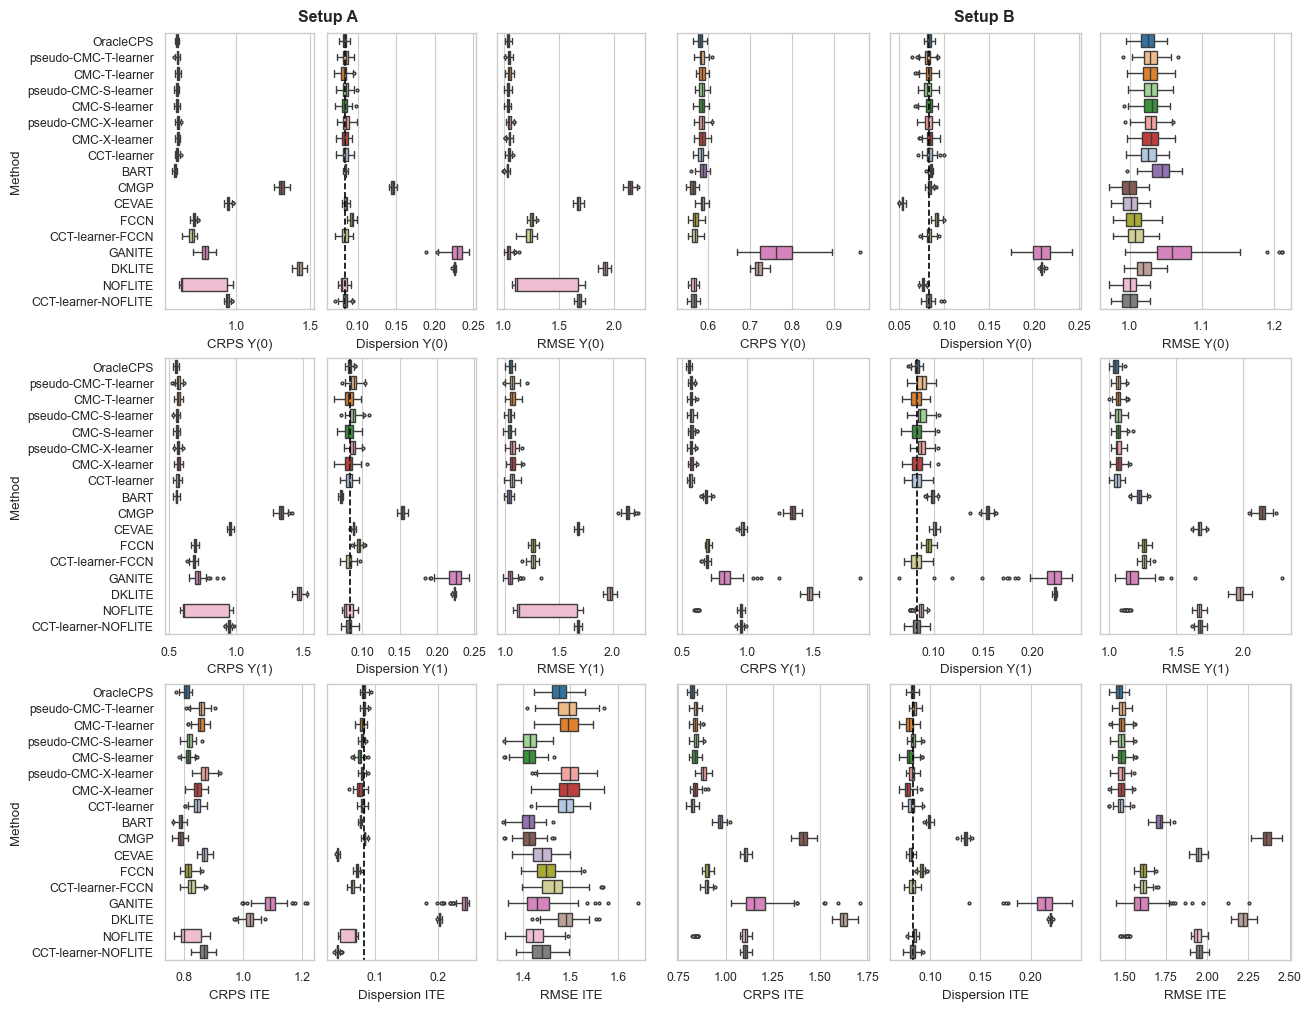

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))
subfigs = fig.subfigures(nrows=1, ncols=2)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(3, 3, sharey=True)
subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(3, 3, sharey=True)
target_name_list = ["Y(0)", "Y(1)", "ITE"]
for i, target in enumerate(["y0", "y1", "ite"]):
    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="A"], y="Method", x=f"crps_{target}", ax=axsA[i, 0],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    # Change the x-axis label
    axsA[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="A"], y="Method", x=f"dispersion_{target}", ax=axsA[i, 1],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
    axsA[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="A"], y="Method", x=f"rmse_{target}", ax=axsA[i, 2],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")

    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="B"], y="Method", x=f"crps_{target}", ax=axsB[i, 0],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    # Change the x-axis label
    axsB[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
    axsB[i, 0].set_ylabel("")  # Remove y-label
    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="B"], y="Method", x=f"dispersion_{target}", ax=axsB[i, 1],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsB[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
    axsB[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
    axsB[i, 1].set_ylabel("")  # Remove y-label
    sns.boxplot(data=df_alaa_filtered[df_alaa_filtered["Setup"]=="B"], y="Method", x=f"rmse_{target}", ax=axsB[i, 2],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsB[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")
    axsB[i, 2].set_ylabel("")  # Remove y-label

    # Remove y-tick labels from all Setup B plots
    for j in range(3):
        axsB[i, j].set_yticklabels([])
        axsB[i, j].tick_params(axis='y', which='both', length=0)

fig.savefig("../../results/figures/results_dist_alaa.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_dist_alaa.png", bbox_inches='tight')
plt.show()

## EDU & IHDP

In [7]:
df_ihdp = pd.read_csv("../../results/outputs/summary/ihdp_dist_summary.csv")
df_edu = pd.read_csv("../../results/outputs/summary/edu_dist_summary.csv")

df_edu.loc[df_edu["Method"].str.contains("CTT"), "Method"] = df_edu.loc[df_edu["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")
df_ihdp.loc[df_ihdp["Method"].str.contains("CTT"), "Method"] = df_ihdp.loc[df_ihdp["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

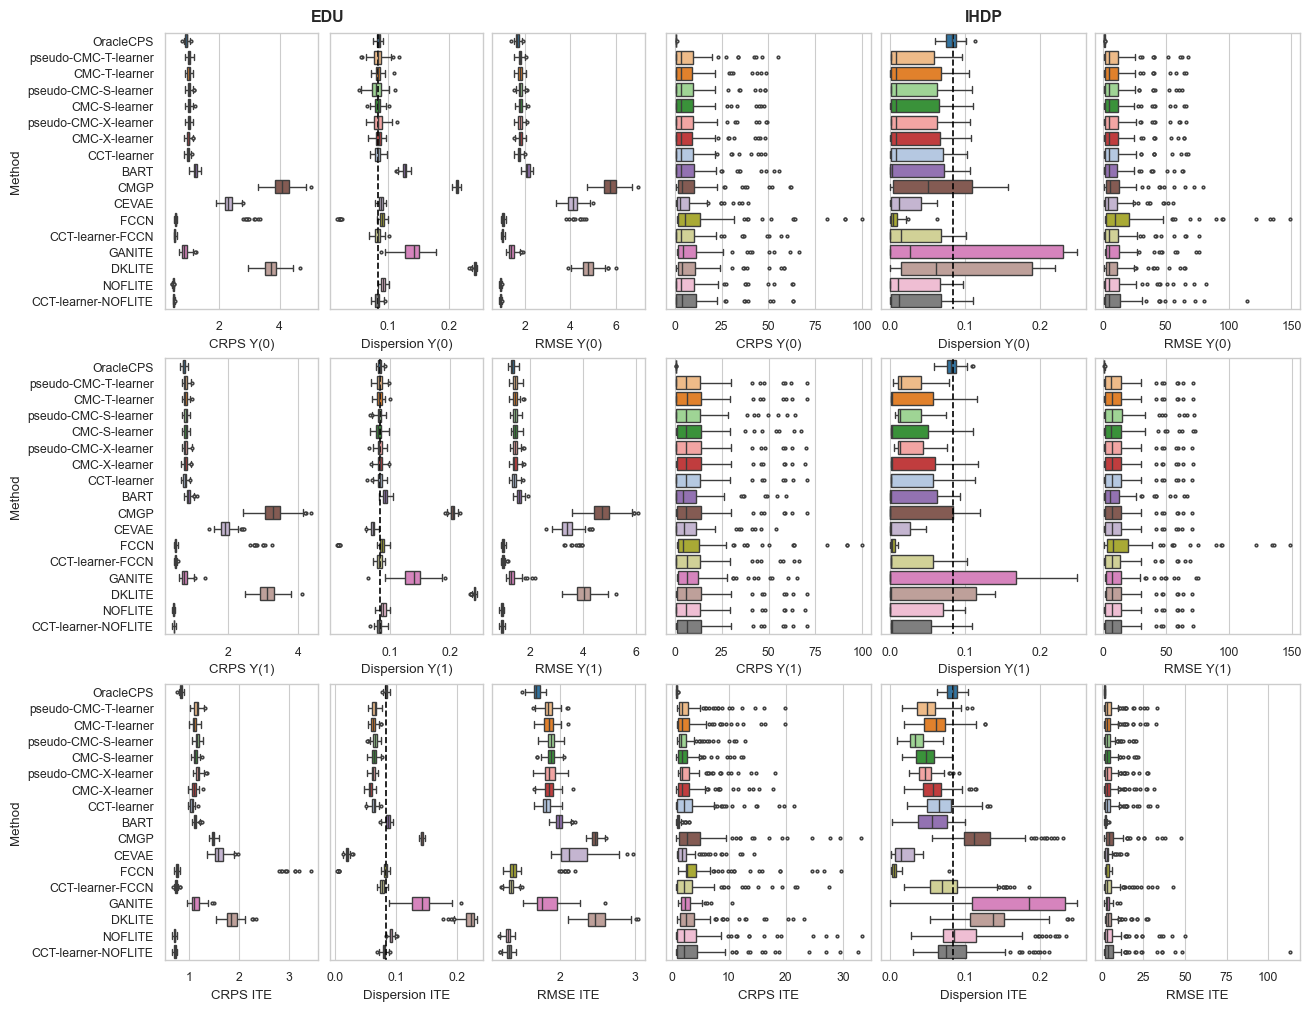

In [8]:
excluded_methods_edu = ["DiffPO", "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",  "CMC-S-learner", "CMC-X-learner"]
excluded_methods_edu = ["DiffPO"]
excluded_methods_ihdp = ["DiffPO", "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",  "CMC-S-learner", "CMC-X-learner"]
excluded_methods_ihdp = ["DiffPO"]
df_edu_filtered = df_edu[~df_edu["Method"].isin(excluded_methods_edu)]
df_ihdp_filtered = df_ihdp[~df_ihdp["Method"].isin(excluded_methods_ihdp)]


fig = plt.figure(constrained_layout=True, figsize=(13, 10))
subfigs = fig.subfigures(nrows=1, ncols=2)
subfigs[0].suptitle('EDU', fontweight='semibold')
axsA = subfigs[0].subplots(3, 3, sharey=True)
subfigs[1].suptitle('IHDP', fontweight='semibold')
axsB = subfigs[1].subplots(3, 3, sharey=True)
target_name_list = ["Y(0)", "Y(1)", "ITE"]
for i, target in enumerate(["y0", "y1", "ite"]):
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"crps_{target}", ax=axsA[i, 0],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    # Change the x-axis label
    axsA[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"dispersion_{target}", ax=axsA[i, 1],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
    axsA[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"rmse_{target}", ax=axsA[i, 2],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")

    sns.boxplot(data=df_ihdp_filtered, y="Method", x=f"crps_{target}", ax=axsB[i, 0],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    # Change the x-axis label
    axsB[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
    sns.boxplot(data=df_ihdp_filtered, y="Method", x=f"dispersion_{target}", ax=axsB[i, 1],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsB[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
    axsB[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
    sns.boxplot(data=df_ihdp_filtered, y="Method", x=f"rmse_{target}", ax=axsB[i, 2],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsB[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")

# Remove y-tick labels from all Setup B plots
for i in range(3):
    for j in range(3):
        axsB[i, j].set_yticklabels([])
        axsB[i, j].tick_params(axis='y', which='both', length=0)
        axsB[i, j].set_ylabel("")
fig.savefig("../../results/figures/results_dist_edu_ihpd.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_dist_edu_ihdp.png", bbox_inches='tight')
plt.show()

## Nie and Wager (non-heteroscedastic)

In [9]:
df_nw_A = pd.read_csv("../../results/outputs/summary/nw_A_dist_summary.csv")
df_nw_B = pd.read_csv("../../results/outputs/summary/nw_B_dist_summary.csv")
df_nw_C = pd.read_csv("../../results/outputs/summary/nw_C_dist_summary.csv")
df_nw_D = pd.read_csv("../../results/outputs/summary/nw_D_dist_summary.csv")

df_nw_A_het = pd.read_csv("../../results/outputs/summary/nw_A_het_dist_summary.csv")
df_nw_B_het = pd.read_csv("../../results/outputs/summary/nw_B_het_dist_summary.csv")
df_nw_C_het = pd.read_csv("../../results/outputs/summary/nw_C_het_dist_summary.csv")
df_nw_D_het = pd.read_csv("../../results/outputs/summary/nw_D_het_dist_summary.csv")

for df in [df_nw_A, df_nw_B, df_nw_C, df_nw_D]:
    df.loc[df["Method"].str.contains("CTT"), "Method"] = df.loc[df["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

for df in [df_nw_A_het, df_nw_B_het, df_nw_C_het, df_nw_D_het]:
    df.loc[df["Method"].str.contains("CTT"), "Method"] = df.loc[df["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

In [10]:
def create_figure_nie_wager(df, df_het, setup, excluded_methods = ["DiffPO"]):
    df = df.rename(columns={"approach": "Method", "setup": "Setup"})
    df_het = df_het.rename(columns={"approach": "Method", "setup": "Setup"})
    df = df[~df["Method"].isin(excluded_methods)]
    df_het = df_het[~df_het["Method"].isin(excluded_methods)]
    fig = plt.figure(constrained_layout=True, figsize=(12, 12))
    subfigs = fig.subfigures(nrows=1, ncols=2)
    subfigs[0].suptitle(f"Setup {setup}", fontweight='semibold')
    axsA = subfigs[0].subplots(3, 3, sharey=True)
    subfigs[1].suptitle(f"Setup {setup} (heteroscedastic)", fontweight='semibold')
    axsB = subfigs[1].subplots(3, 3, sharey=True)
    target_name_list = ["Y(0)", "Y(1)", "ITE"]
    for i, target in enumerate(["y0", "y1", "ite"]):
        sns.boxplot(data=df, y="Method", x=f"crps_{target}", ax=axsA[i, 0],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        # Change the x-axis label
        axsA[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
        sns.boxplot(data=df, y="Method", x=f"dispersion_{target}", ax=axsA[i, 1],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        axsA[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
        axsA[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
        sns.boxplot(data=df, y="Method", x=f"rmse_{target}", ax=axsA[i, 2],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        axsA[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")

        sns.boxplot(data=df_het, y="Method", x=f"crps_{target}", ax=axsB[i, 0],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        # Change the x-axis label
        axsB[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
        sns.boxplot(data=df_het, y="Method", x=f"dispersion_{target}", ax=axsB[i, 1],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        axsB[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
        axsB[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
        sns.boxplot(data=df_het, y="Method", x=f"rmse_{target}", ax=axsB[i, 2],
                    hue="Method", dodge=False, flierprops=flier_props, palette=palette)
        axsB[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")

    # Remove y-tick labels from all Setup B plots
    for i in range(3):
        for j in range(3):
            axsB[i, j].set_yticklabels([])
            axsB[i, j].tick_params(axis='y', which='both', length=0)
            axsB[i, j].set_ylabel("")
    fig.savefig(f"../../results/figures/results_dist_nie_wager_setup{setup}.pdf", bbox_inches='tight')
    fig.savefig(f"../../results/figures/results_dist_nie_wager_setup{setup}.png", bbox_inches='tight')
    plt.show()

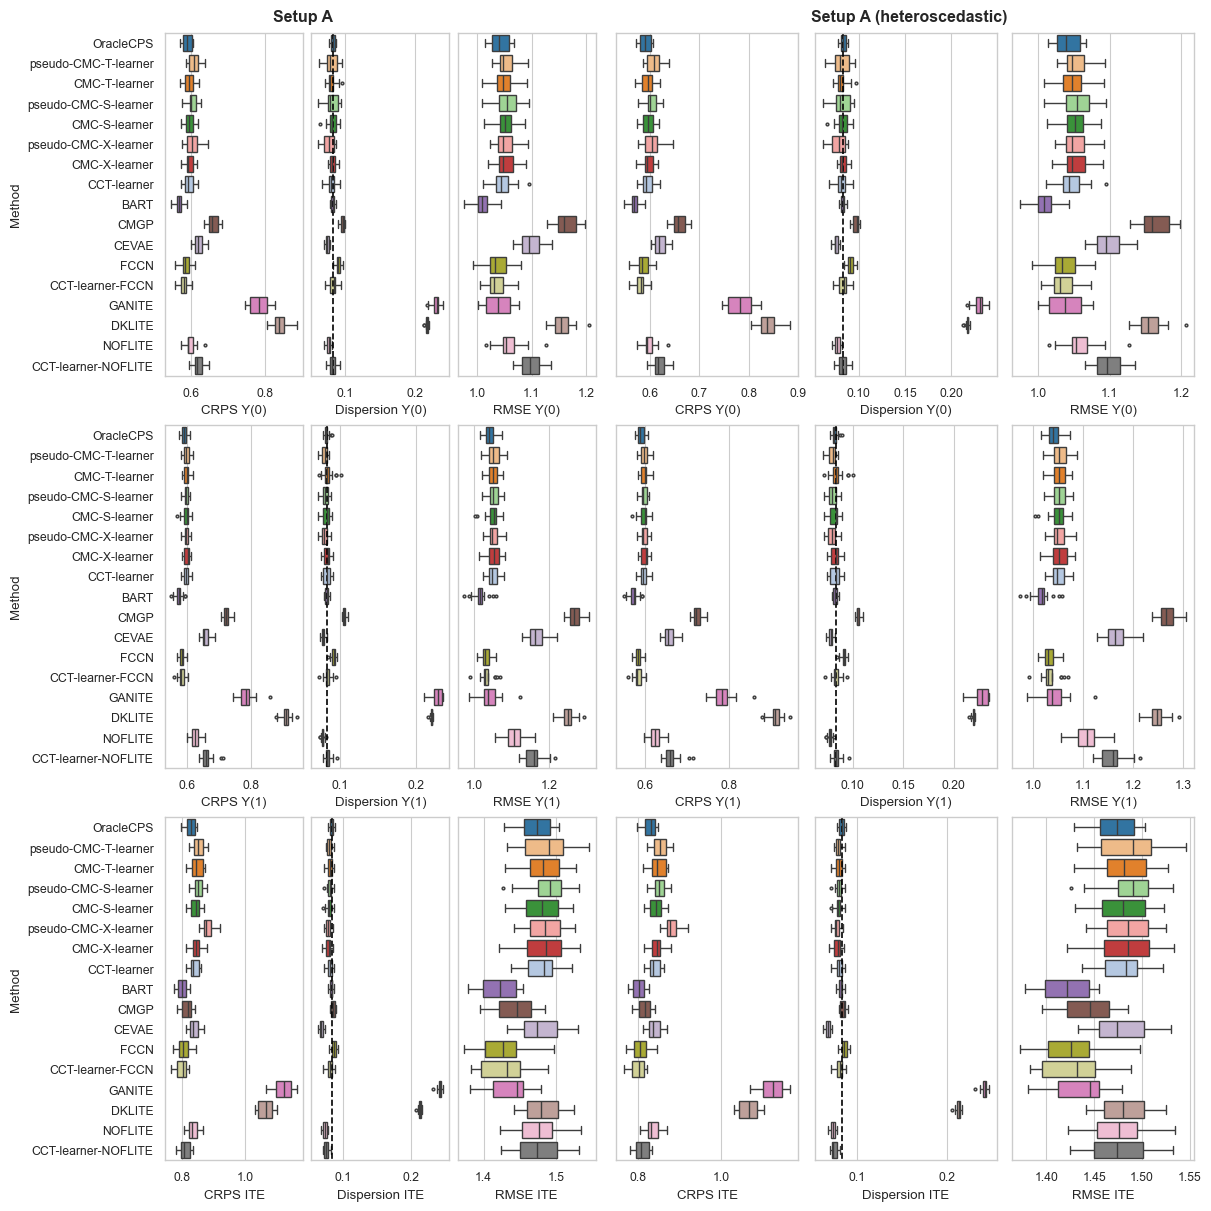

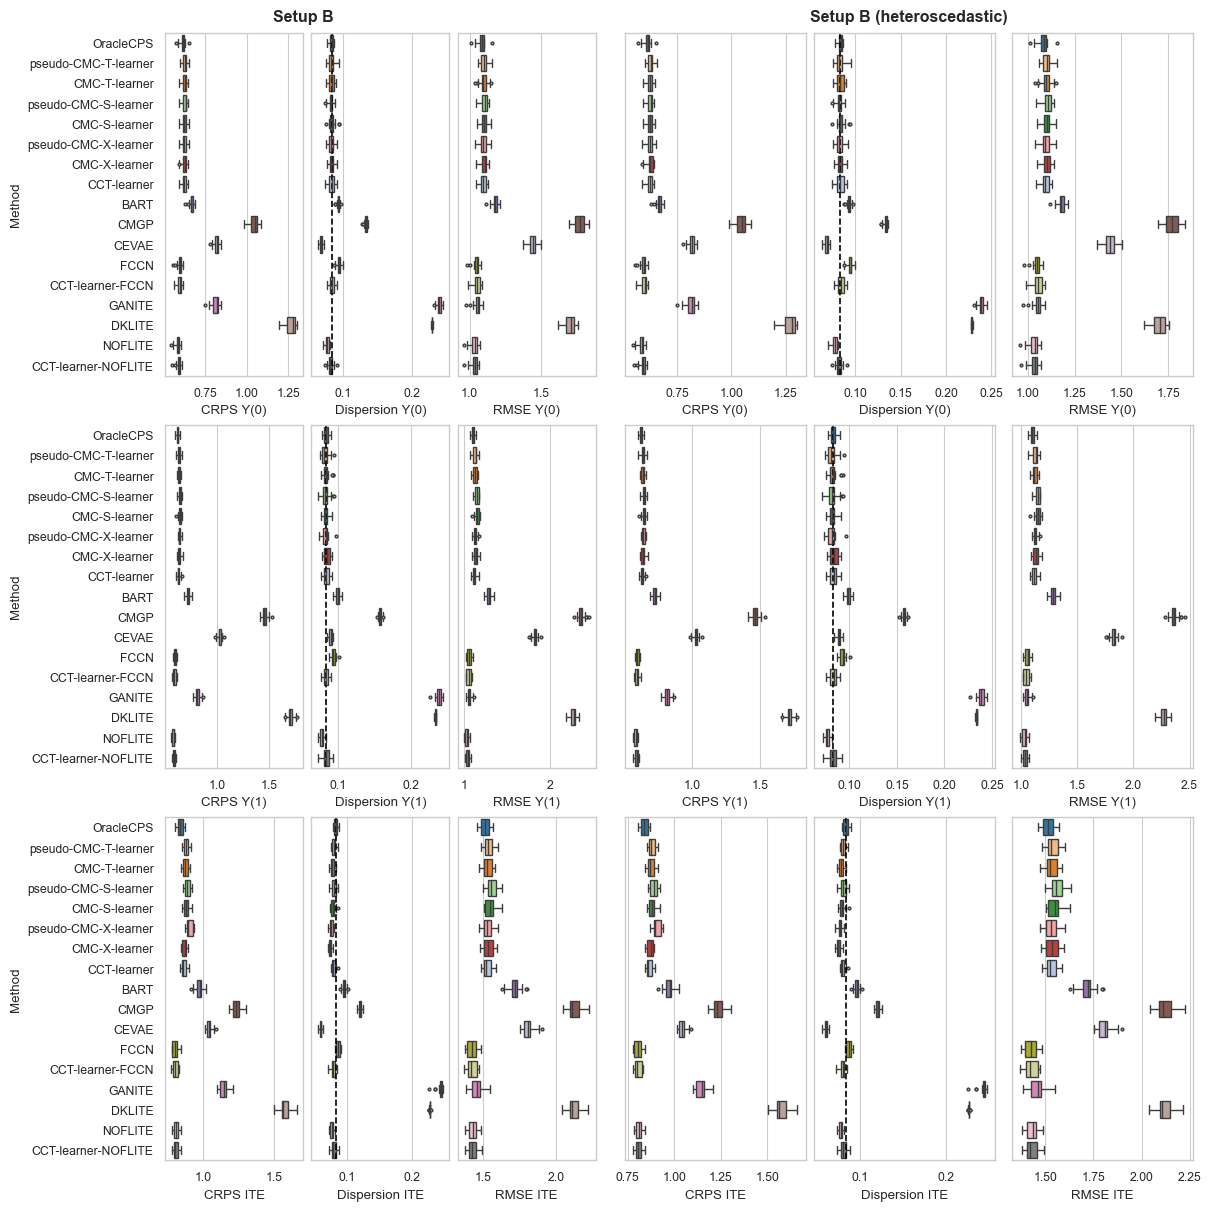

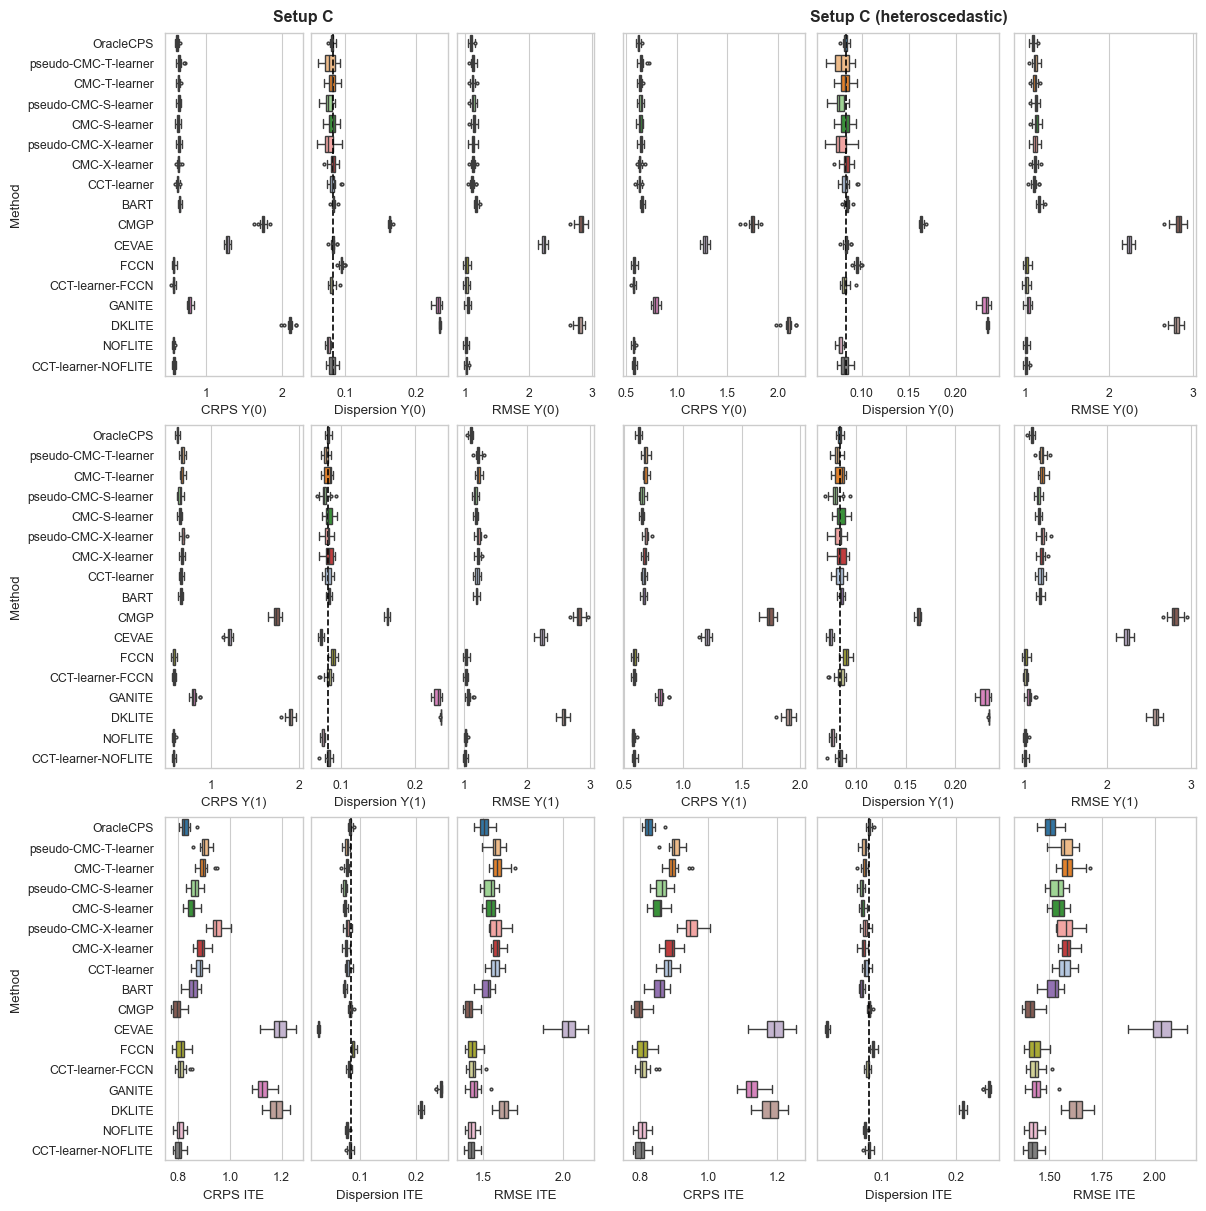

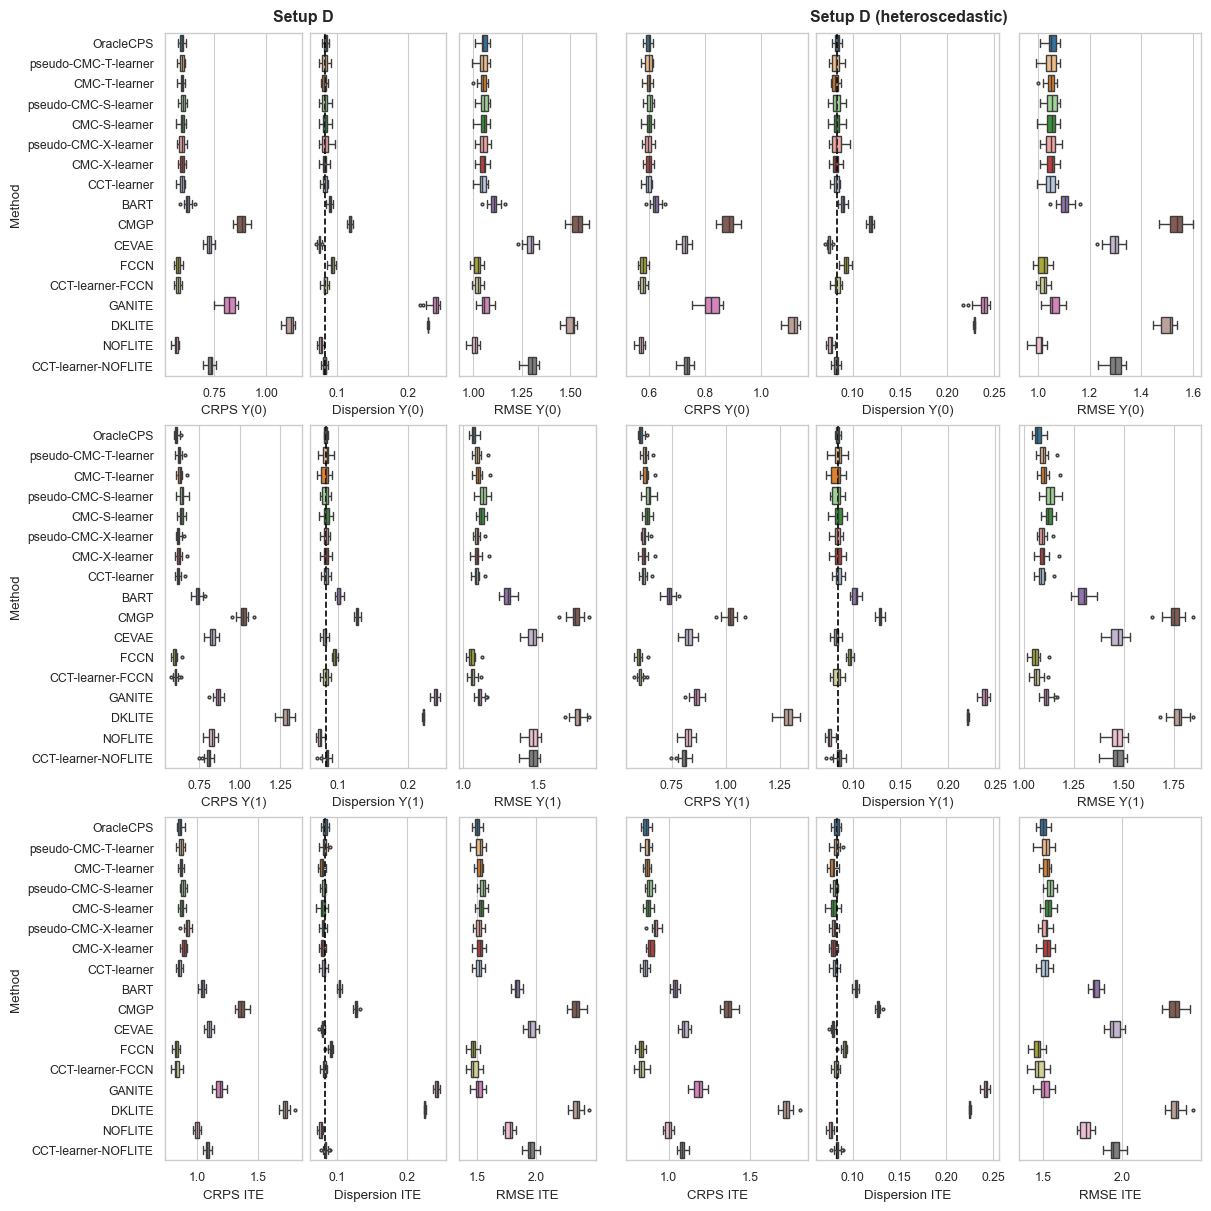

In [11]:
for df, df_het, setup_name in zip([df_nw_A, df_nw_B, df_nw_C, df_nw_D], [df_nw_A_het, df_nw_B_het, df_nw_C_het, df_nw_D_het],
                            ["A", "B", "C", "D"]):
    create_figure_nie_wager(df, df_het, setup_name)

## PIT Values

In [12]:
df_alaa_A = pd.read_csv("../../results/outputs/summary/alaa_A_dist_summary.csv")
df_alaa_A.loc[df_alaa_A["Method"].str.contains("CTT"), "Method"] = df_alaa_A.loc[df_alaa_A["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")
df_alaa_B = pd.read_csv("../../results/outputs/summary/alaa_B_dist_summary.csv")
df_alaa_B.loc[df_alaa_B["Method"].str.contains("CTT"), "Method"] = df_alaa_B.loc[df_alaa_B["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

In [13]:
df_edu_p_values = df_edu[["Method", "Setup", "p_values_y0", "p_values_y1", "p_values_ite"]].copy()
df_alaa_A_p_values = df_alaa_A[["Method", "Setup", "p_values_y0", "p_values_y1", "p_values_ite"]].copy()
df_alaa_B_p_values = df_alaa_B[["Method", "Setup", "p_values_y0", "p_values_y1", "p_values_ite"]].copy()

In [14]:
import ast

df_edu_p_values["p_values_y0"] = df_edu_p_values["p_values_y0"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_edu_p_values["p_values_y1"] = df_edu_p_values["p_values_y1"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_edu_p_values["p_values_ite"] = df_edu_p_values["p_values_ite"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))

df_alaa_A_p_values["p_values_y0"] = df_alaa_A_p_values["p_values_y0"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_alaa_A_p_values["p_values_y1"] = df_alaa_A_p_values["p_values_y1"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_alaa_A_p_values["p_values_ite"] = df_alaa_A_p_values["p_values_ite"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))

df_alaa_B_p_values["p_values_y0"] = df_alaa_B_p_values["p_values_y0"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_alaa_B_p_values["p_values_y1"] = df_alaa_B_p_values["p_values_y1"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))
df_alaa_B_p_values["p_values_ite"] = df_alaa_B_p_values["p_values_ite"].apply(lambda x: np.array(ast.literal_eval(x)) if not pd.isna(x) else np.array([]))

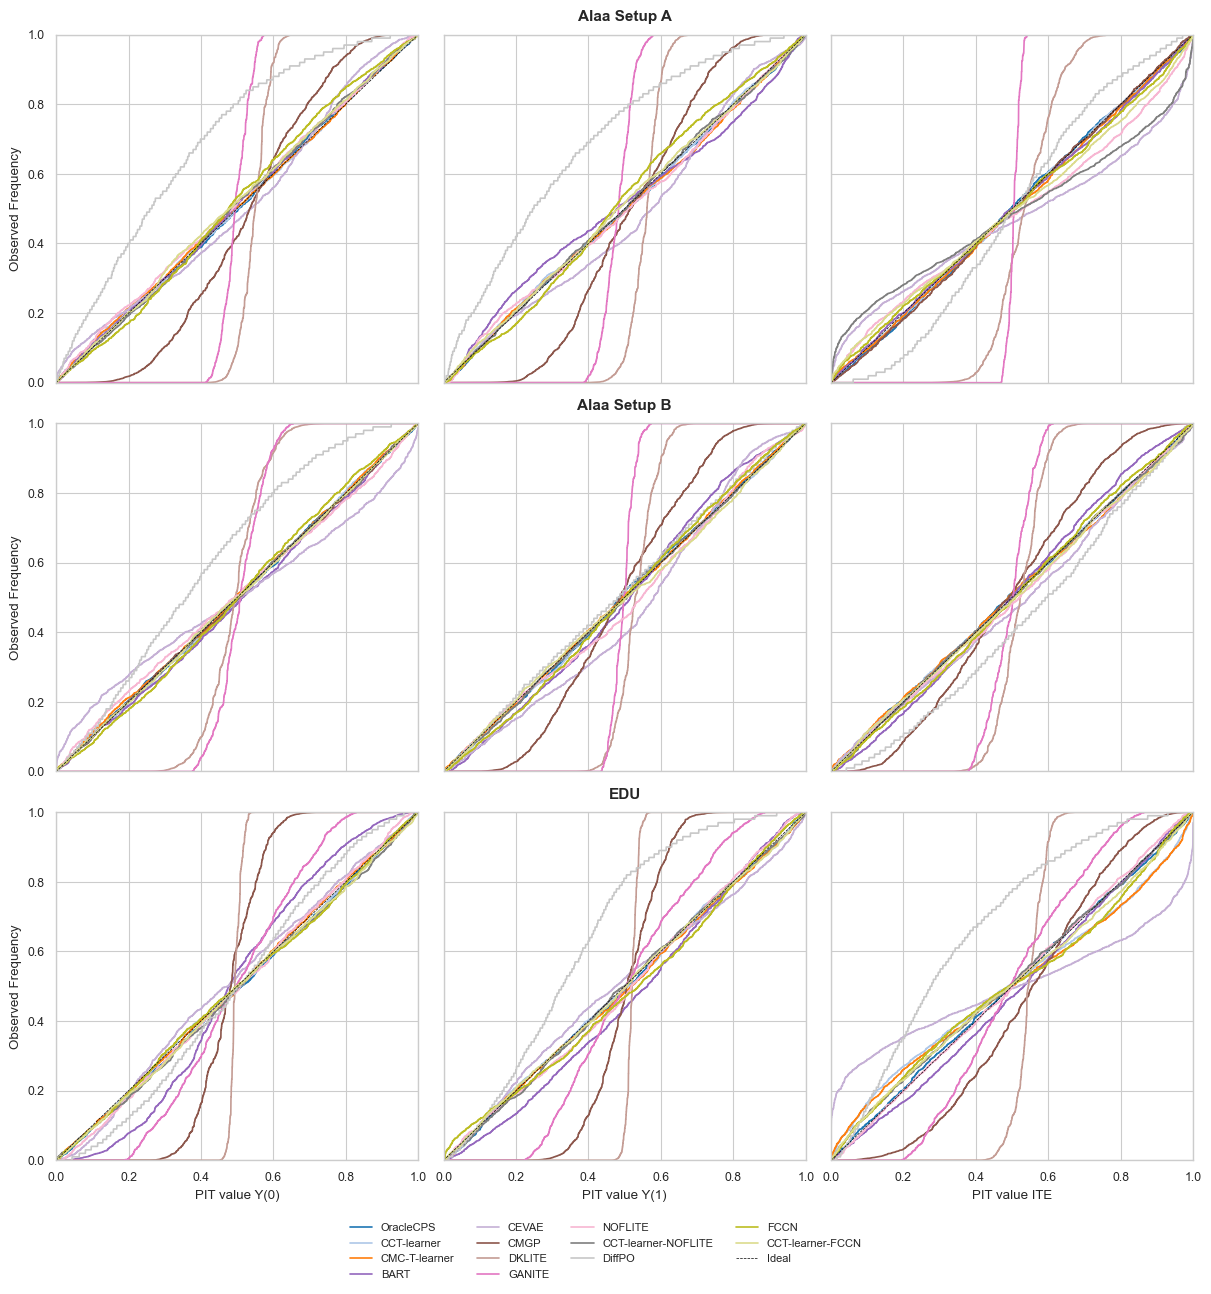

In [17]:
import numpy as np
import matplotlib.pyplot as plt

excluded_methods = [
    "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",
    "CMC-S-learner",       "CMC-X-learner"
]

# your dataframes and their descriptive names
df_list    = [df_alaa_A_p_values, df_alaa_B_p_values, df_edu_p_values]
row_titles = ["Alaa Setup A", "Alaa Setup B", "EDU"]

titles  = ["Y(0)", "Y(1)", "ITE"]
targets = ["y0", "y1", "ite"]

fig, axs = plt.subplots(
    nrows=3, ncols=3,
    figsize=(12, 12),
    sharex=True, sharey=True,
    constrained_layout=True
)

# plot
for i, (df, row_title) in enumerate(zip(df_list, row_titles)):
    for j, (col_title, target) in enumerate(zip(titles, targets)):
        ax = axs[i, j]
        # set column titles only on top row
        # set subtitles at the middle column of each row
        if j == 1:
            ax.set_title(row_title, fontsize=11, pad=10, loc='center', fontweight='semibold')

        if i == 2:
            ax.set_xlabel(f"PIT value {col_title}")
        if j == 0:
            ax.set_ylabel("Observed Frequency")

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        for method in methods:
            if method in excluded_methods:
                continue
            arrs = df[df["Method"] == method][f"p_values_{target}"].values
            if len(arrs) == 0:
                continue
            p_values = np.sort(np.concatenate(arrs))
            ax.plot(
                np.linspace(0, 1, len(p_values)),
                p_values,
                color=palette[method],
                label=method
            )

        ax.plot([0, 1], [0, 1], '--', color='black', label='Ideal', linewidth=0.5)

# legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.07),
    ncol=4,
    fontsize=8,
    frameon=False
)

# fig.suptitle("PIT-Value Distributions by Dataset and Target", fontsize=14, y=1.02)

plt.show()
fig.savefig("../../results/figures/results_dist_all_p_values.pdf", bbox_inches='tight')